<a href="https://twitter.com/intent/tweet?url=https://gweindel.github.io/a-surprising-link-between-electrophysiological-data-in-monkeys-and-a-behavioral-model-in-humans&text=# A surprising link between electrophysiological data in monkeys and a behavioral model in humans" target="_blank"><img align="center" src="https://github.com/GWeindel/gweindel.github.io-src/raw/master/content/resources/img/Macaca_mulatta.jpg" scale="20%"/></a>


# A surprising link between electrophysiological data in monkeys and a behavioral model in humans

## Preamble 
With Thibault Gajdos, Boris Burle and F.-Xavier Alario we recently published a [preprint](https://psyarxiv.com/gewb3/) titled "The Decisive Role of Non-Decision Time for Interpreting the Parameters of Decision Making Models". As in any article, some choices had to be made and what I am presenting in this post was not the focus of the article (plus the analysis was unplanned and therefore should be taken with a grain of salt), but I still wanted to share this result as I find it extremely interesting.

In the study reported in the preprint, using experimental manipulations and an electrophysiological measure of response execution, we evaluated the ability of a decision-making model to account for latent cognitive processes in a perceptual decision task.

In this task we manipulated the amount of force to produce a response, speed accuracy trade-off instructions and finally stimulus contrast. This last manipulation had an interesting property that revealed a surprising pattern ! But let's first review the task of the participants and some of the results from the study.

## The task

Participants had to indicate which of two sinusoidal gratings, left and right of a fixation cross, had the most contrast in it with the corresponding button press (hint : it's on the left on the next image):

<img align="center" src="https://github.com/GWeindel/gweindel.github.io-src/raw/master/content/resources/img/stimulus.png" scale="20%">

Now the contrast manipulation consisted in increasing the overall contrast of both stimuli while maintaining their difference constant :

<img align="center" src="https://github.com/GWeindel/gweindel.github.io-src/raw/master/content/resources/img/stimuli_h.png" scale="20%">

Higher contrast, as on the right of the previous image, yields faster brain response even in the earliest visual sensory systems compared to dimmer stimuli. The nice thing about that manipulation is that, according to the law of Weber-Fechner, the difficulty in comparing the gratings increases with the increase in brightness. This can be seen on the behavioral performance, participants proportion of errors and Reaction Times ($RT$) increase when contrast increases (see the preprint for details of the figure) : 

<img align="center" src="https://github.com/GWeindel/gweindel.github.io-src/raw/master/content/resources/img/behavior.png" width=700>

Hence we have here a manipulation where you expect that the time for visual encoding of the stimulus evolves inversly to the time you need to decide. The overall measure of RT cannot show you both effects as they are weighting each other out. Ideally we would like to have a cognitive model of behavior accounting for both dimensions of decision and encoding times but that seems like a hard test for a model. 

In our paper we tested amongst others, whether the well-known Drift Diffusion Model (as implemented by Ratcliff, \& Tuerlinckx, 2002) captures simultaneously the decision and visual encoding properties of this manipulation.


## Initial results
The increase in decision time is obviously captured by the model given the high impact of the increase in contrast on both participants accuracy and $RT$s. More interesting is the fact that the model is also able to capture the decrease in the parameter assumed to relate to visual encoding of the stimulus with the increase in contrast. Let's illustrate it with the actual data from the preprint :

In [1]:
# I provide the code for each figure just for those who could be interested but you can skip these cells and just look at the outputs
# Following loads the packages and the data from the github of the preprint
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import arviz as az
plt.style.use('seaborn-ticks')#Plotting theme

PMTstats = pd.read_csv('https://github.com/GWeindel/The-Decisive-Role-of-Non-Decision-Time/raw/main/DDM/PMT_M13_stats.csv', index_col=0)## Recovering DDM estimates from fit
PMTtraces = pd.read_csv('https://github.com/GWeindel/The-Decisive-Role-of-Non-Decision-Time/raw/main/DDM/PMT_M13_traces.csv', index_col=0)## See the preprint for the details

The following figure illustrates this observation, the parameter for encoding time ($T_{e}$ y-axis) is indeed decreasing with contrast increase (x-axis).

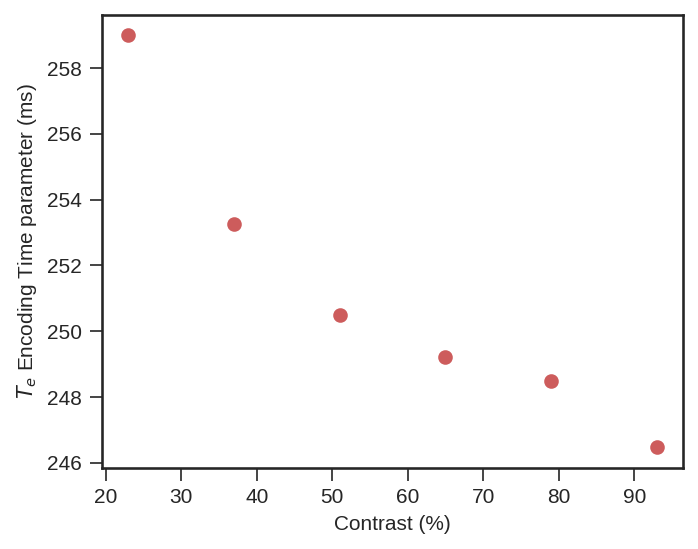

In [2]:
plt.figure(figsize=(5,4), dpi=150)#Graphical parameters

m = PMTstats[PMTstats.index.str.contains("t\(low.Speed")]["mean"]#Taking a subset (the best) of the estimates from the preprints

# Plotting these points
plt.errorbar(np.linspace(23,93,6), m*1000,
             ls='', marker="o", c="indianred")

# Other graphical parameters
plt.ylabel(r'$T_{e}$ Encoding Time parameter (ms)')
plt.xlabel('Contrast (%)');

__Great news__, a model like the drift diffusion model, using only RTs and choices, is able to show that visual encoding time is decreasing even though difficulty is increasing the $RT$s (although that is only true under some conditions and there is some uncertainty associated but see the preprint).

## A surprising link

Now one thing is particularly interesting. I started to talk with scientists with more expertise in visual processing about the experiment. At that occasion I was redirected to an article written in 2012 by Reynaud, Masson and Chavane (https://doi.org/10.1523/JNEUROSCI.1618-12.2012). In their article the authors analyze, using voltage-sensitive dye, the temporal dynamics of visual neuron in the primary visual cortex, V1, of two monkeys (_Macaca mulata_) in response to a visual grating similar to the one we used. In one of their analysis (see Figure 5B. of their article) they report measurement of onset of activity in V1 neurons in response to different contrasts of the grating. Using the Naka-Rushton equation, a well known luminance-response function, in its inverted version (Barthelemy, Fleuriet \& Masson, 2010) they provide a description of the onset of activity in V1 in response to different contrast levels.

Now things are getting even more interesting. One test we could do is : does the data from these monkeys relate to our estimate of visual encoding time in human using only a behavioral model (and some physiological information about response execution) ?

That would be wild but we tested it anyway, especially because the lead author of the paper on V1 activity in monkeys guessed that we should have a non-linear relationship which is indeed apparent in the previous Figure. The only thing we had to do was to recover the parameters of the inverted Naka-Rushton they obtained and generate predictions for the contrast levels we used in our study. Then we can just compare their predictions and our estimate of visual encoding in humans.

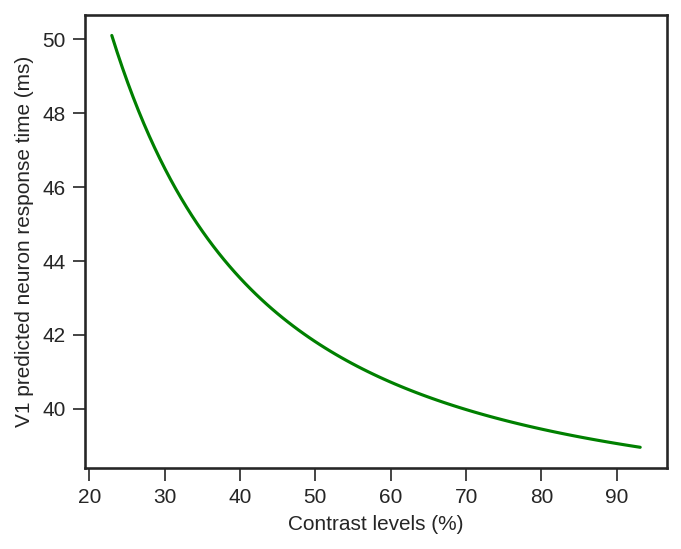

In [3]:
def Naka_Rushton(par,contrast,maxAmp, maxShift):#Inverted Naka-rushton equation from Barthélemy, Fleuriet and Masson 2010
    c50, slope = par[0],par[1]
    return (maxAmp + maxShift * ((contrast**slope)/((c50**slope)+(contrast**slope))))

# Hereby we obtain the prediction of onset of neurons in V1, for the contrast level we used, with the parameters we recovered from their article 
# To see how we recovered the parameters see https://github.com/GWeindel/The-Decisive-Role-of-Non-Decision-Time/blob/main/3-DDM_analysis.ipynb
predicted_V1 = Naka_Rushton(par=[11.42,-1.54] , maxAmp = 36.99, maxShift=51.66,
                                                contrast=np.linspace(23,93,100))

plt.figure(figsize=(5,4), dpi=150)
plt.plot(np.linspace(23,93.1,100), predicted_V1, color="green")#Plotting predictions
plt.xlabel('Contrast levels (%)')
plt.ylabel('V1 predicted neuron response time (ms)');

Damned that looks close !! What if we superpose both ? Well we could do that simply by displaying both, but obviously V1 neurons respond really fast and visual processing goes on beyond the first response latency, therefore we need to be on the same scale. We did this be simply subtracting the mean of each variable (human behavioral model vs V1 measurment) to each data point from the same variable ($x_i - \overline{x}$). Doing so we only keep the relative difference of each contrast point to the mean of each variable. 

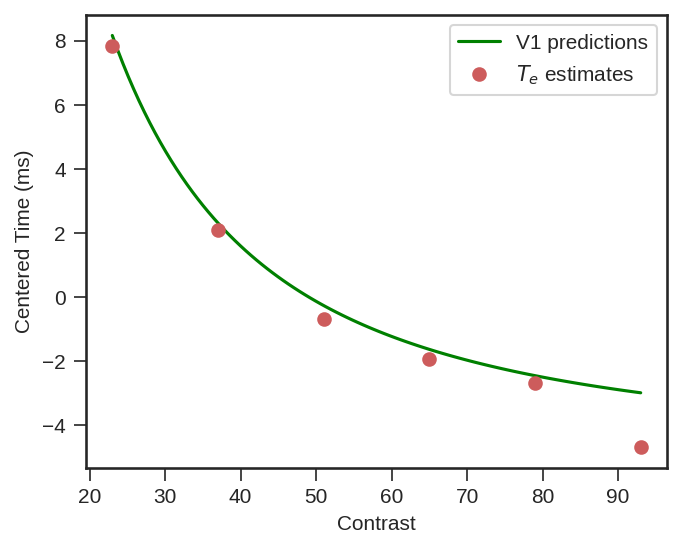

In [4]:
plt.figure(figsize=(5,4), dpi=150)

# plotting the centered predictions
plt.plot(np.linspace(23,93,100), predicted_V1-np.mean(predicted_V1), color="green", label=r'V1 predictions')

# Recovering the estimates of the behavioral model for humans
m = PMTstats[PMTstats.index.str.contains("t\(low.Speed")]["mean"]# I only use mean, see preprint for full uncertainty representation
m_scaled = m - np.mean(m) # centering

# plotting the centered estimates
plt.errorbar(np.linspace(23,93,6), m_scaled*1000, #*1000 to convert to milliseconds
             ls='', marker="o", c="indianred", label='$T_{e}$ estimates')

# Paramètres graphiques
plt.legend(frameon=True)
plt.ylabel(r'Centered Time (ms)')
plt.xlabel('Contrast');

Wow... That is impressive !

A behavioral model (+ physiology of response execution) fitted on data from a decision making task performed by humans is capturing visual encoding latencies that very closely match actual measurment of primary visual neurons in monkeys ! It is important to note that __no fit occurred__ between V1 predictions and the estimated encoding time, we just centered each variable ! 

Now the story doesn't end here This congruence for example only happens when we particularly stress participants to respond as fast as possible. When we switch to an accuracy-focused condition, things do really not look the same :

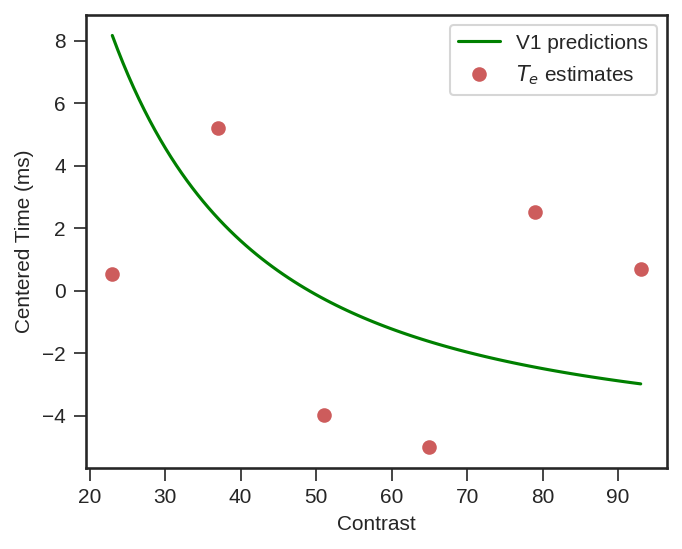

In [5]:
plt.figure(figsize=(5,4), dpi=150)

# plotting the centered predictions
plt.plot(np.linspace(23,93,100), predicted_V1-np.mean(predicted_V1), color="green", label=r'V1 predictions')

# Recovering the estimates of the behavioral model for humans
m = PMTstats[PMTstats.index.str.contains("t\(low.Accuracy")]["mean"]# I only use mean, see preprint for full uncertainty representation
m_scaled = m - np.mean(m) # centering

# plotting the centered estimates
plt.errorbar(np.linspace(23,93,6), m_scaled*1000, #*1000 to convert to milliseconds
             ls='', marker="o", c="indianred", label='$T_{e}$ estimates')

# Paramètres graphiques
plt.legend(frameon=True)
plt.ylabel(r'Centered Time (ms)')
plt.xlabel('Contrast');

But still, the fact that physiological measurment of primary visual cortex neurons from another specie predicts that well the estimates of a behavioral model of decision making in humans is a really impressive performance ! 

### Bibliography

- Barthélemy, F. V., Fleuriet, J., & Masson, G. S. (2010). Temporal dynamics of 2D motion integration for ocular following in macaque monkeys. Journal of neurophysiology, 103(3), 1275-1282.
- Ratcliff, R., & Tuerlinckx, F. (2002). Estimating parameters of the diffusion model: Approaches to dealing with contaminant reaction times and parameter variability. Psychonomic bulletin & review, 9(3), 438-481.
- Reynaud, A., Masson, G. S., & Chavane, F. (2012). Dynamics of local input normalization result from balanced short-and long-range intracortical interactions in area V1. Journal of neuroscience, 32(36), 12558-12569.